# Load stack_tup

In [1]:
%matplotlib inline
from __future__ import print_function,absolute_import,division,unicode_literals
import numpy as np
import glob,os,sys,copy,imp 
from scipy import stats as scistats
import matplotlib as mpl
mpl.rcParams['font.family']='stixgeneral'
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import QTable,Table
from astropy.io import ascii,fits
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from linetools.spectralline import AbsLine
import linetools.utils as ltu
from xastropy.igm.abs_sys import abssys_utils as abssys
from xastropy import spec as xpsec
from xastropy.plotting import utils as xputils
from xastropy.xutils import xdebug as xdb
from xastropy.obs import radec as xor
from xastropy.atomic import ionization as xai
from xastropy.xutils import fits as xxf
sys.path.append(os.path.abspath("../../../../py"))
from enigma.qpq import utils as qpqutils
from enigma.qpq import spec as qpqs
from enigma.qpq import stacks as qpqk
sys.path.append(os.path.abspath("../Bootstrap/py"))
import qpq9_boot as qpq9b
sys.path.append(os.path.abspath("./py"))
import qpq9_stacks as qpq9k

/Users/lwymarie/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


/Users/lwymarie/python/specdb/specdb/query_catalog.py:140: UserWarning: No sources found at your coordinate within tol=0.5 arcsec.  Returning None
  warnings.warn("No sources found at your coordinate within tol={:g}.  Returning None".format(tol))
/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:295: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
1.95950620869 1 / Angstrom
No spectrum found for BOSSJ0001+0000 and wvobs=8359.87 Angstrom!
3.90199952094 1 / Angstrom
No spectrum found for BOSSJ0008-0039 and wvobs=7306.58 Angstrom!
3.24163041775 1 / Angstrom
No spectrum found for BOSSJ0008-0039 and wvobs=8215.93 Angstrom!
5.22357649931 1 / Angstrom
No spectrum found for BOSSJ0042+1350 and wvobs=7762.94 Angstrom!
21.5242916444 1 / Angstrom
15.5022425795 1 / Angstrom
Using spec-6203-56266-0300.fits.gz for BOSSJ0047+1447
S/N 21.5242916444 1 / Angstrom


/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:850: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__itruediv__(other)
/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:850: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__itruediv__(other)
/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:269: RuntimeWarning: invalid value encountered in greater
  gdsigval = np.where(self.data['sig'][kk].data > 0.)[0]
/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:270: RuntimeWarning: invalid value encountered in less_equal
  badsigval = self.data['sig'][kk].data <= 0.


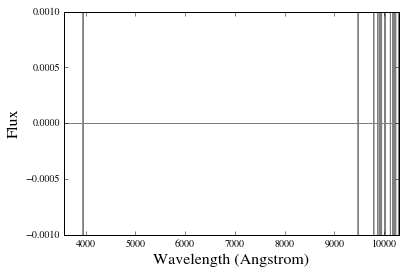

/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:807: UserWarning: Ignoring NAN and inf in flux
  warnings.warn("Ignoring NAN and inf in flux")
/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:879: RuntimeWarning: invalid value encountered in less_equal
  bad = np.where(self.sig.value <= 0.)[0]
/Users/lwymarie/python/specdb/specdb/query_catalog.py:145: UserWarning: Found multiple sources in the catalog. Taking the closest one
  warnings.warn("Found multiple sources in the catalog. Taking the closest one")


0.94873000285 1 / Angstrom
No spectrum found for BOSSJ0057-0001 and wvobs=8838.87 Angstrom!
7.12294300403 1 / Angstrom
BOSSJ0103-0002 does not survive atmosphere cut
No spectrum found for BOSSJ0103-0002 and wvobs=7700.44 Angstrom!
5.13291643988 1 / Angstrom
No spectrum found for BOSSJ0106+0056 and wvobs=8020.81 Angstrom!
No spectrum found for SDSSJ0111+1402 and wvobs=9745.69 Angstrom!
7.99245858919 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ014917.46-002158.4.fits.gz for SDSSJ0149-0021
S/N 7.99245858919 1 / Angstrom


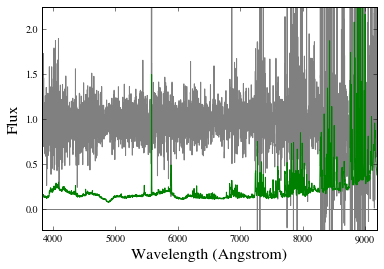

1.42615527049 1 / Angstrom
No spectrum found for BOSSJ0154+0020 and wvobs=7755.51 Angstrom!
1.64214231605 1 / Angstrom
No spectrum found for BOSSJ0206+2238 and wvobs=7280.21 Angstrom!
2.81064282773 1 / Angstrom
No spectrum found for BOSSJ0214-0052 and wvobs=7835.16 Angstrom!
5.42421654138 1 / Angstrom
2.73203474499 1 / Angstrom
No spectrum found for BOSSJ0224-0046 and wvobs=7538.74 Angstrom!
4.32240187212 1 / Angstrom
No spectrum found for BOSSJ0230-0333 and wvobs=9452.36 Angstrom!
3.28753438111 1 / Angstrom
No continuum: /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ023946.44-010644.1_F.fits.gz
No spectrum found for BOSSJ0239-0106 and wvobs=9224.56 Angstrom!
2.1352133648 1 / Angstrom
No spectrum found for BOSSJ0242-0046 and wvobs=7746.73 Angstrom!
4.9800781273 1 / Angstrom
No spectrum found for BOSSJ0250-0047 and wvobs=7976.11 Angstrom!
3.79398232404 1 / Angstrom
No spectrum found for BOSSJ0334-0058 and wvobs=7338.56 Angstrom!
36.6524993281 1 / Angstrom
Using /u/xavier/Dropbox//Q

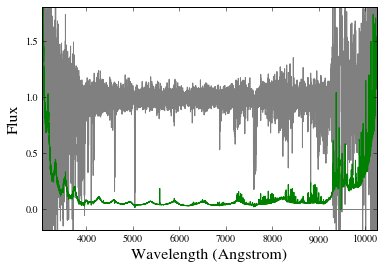

54.2235156675 1 / Angstrom
SDSSJ0409-0411 does not survive atmosphere cut
No spectrum found for SDSSJ0409-0411 and wvobs=7593.5 Angstrom!
2.74431014102 1 / Angstrom
No spectrum found for BOSSJ0749+3702 and wvobs=8266.91 Angstrom!
7.03700706469 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ075259.14+401118.4.fits.gz for SDSSJ0752+4011
S/N 7.03700706469 1 / Angstrom


/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:858: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__rtruediv__(other)


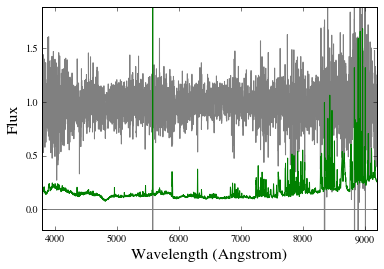

No spectrum found for APOJ0800+3542 and wvobs=8339.6 Angstrom!
3.23904701125 1 / Angstrom
No spectrum found for BOSSJ0809+4539 and wvobs=8504.23 Angstrom!
11.1951451158 1 / Angstrom
Using spec-4463-55868-0778.fits.gz for BOSSJ0812+2620
S/N 11.1951451158 1 / Angstrom


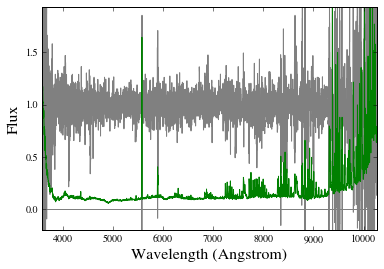

2.77574929102 1 / Angstrom
No spectrum found for BOSSJ0814+0402 and wvobs=7730.43 Angstrom!
8.1642213189 1 / Angstrom
BOSSJ0818+1527 does not survive atmosphere cut
5.30844090035 1 / Angstrom
No spectrum found for BOSSJ0818+1527 and wvobs=7706.88 Angstrom!
10.3382673642 1 / Angstrom
BOSSJ0818+1232 does not survive atmosphere cut
No spectrum found for BOSSJ0818+1232 and wvobs=7554.4 Angstrom!
4.61481065588 1 / Angstrom
No spectrum found for BOSSJ0826+4708 and wvobs=7826.2 Angstrom!
11.3853493936 1 / Angstrom
6.48053275938 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ082844.87+454518.2.fits for SDSSJ0828+4545
S/N 11.3853493936 1 / Angstrom


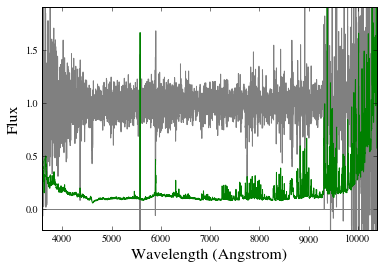

9.49627043962 1 / Angstrom
Using spec-7277-56748-0713.fits.gz for BOSSJ0830+5452
S/N 9.49627043962 1 / Angstrom


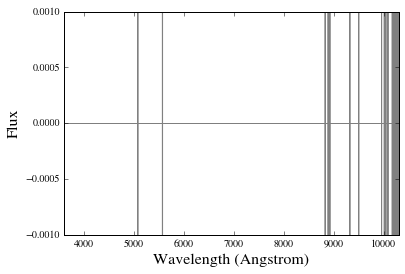

5.49341994894 1 / Angstrom
No spectrum found for BOSSJ0833+4823 and wvobs=7272.91 Angstrom!
1.89314241582 1 / Angstrom
No spectrum found for BOSSJ0837+0810 and wvobs=8296.52 Angstrom!
No spectrum found for APOJ0837+3630 and wvobs=7928.16 Angstrom!
No spectrum found for APOJ0837+3837 and wvobs=8563.61 Angstrom!
4.99055216473 1 / Angstrom
No spectrum found for BOSSJ0838+4621 and wvobs=7720.51 Angstrom!
6.78798669602 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ084159.26+392140.0.fits for BOSSJ0841+3921
S/N 6.78798669602 1 / Angstrom


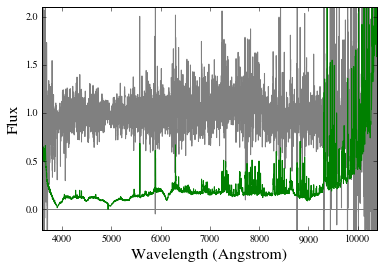

6.56751168944 1 / Angstrom
BOSSJ0844+4839 does not survive atmosphere cut
No spectrum found for BOSSJ0844+4839 and wvobs=7556.45 Angstrom!
1.05609438822 1 / Angstrom
No spectrum found for BOSSJ0845+3202 and wvobs=8058.03 Angstrom!
27.2848054013 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ085357.49-001106.1_F.fits.gz for BOSSJ0853-0011
S/N 27.2848054013 1 / Angstrom


/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:841: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


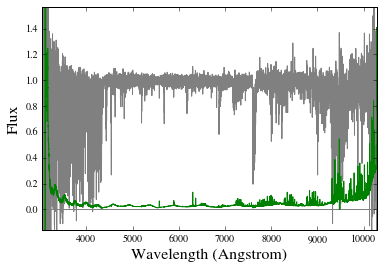

1.78276271609 1 / Angstrom
No spectrum found for BOSSJ0856+5514 and wvobs=7330.08 Angstrom!
11.9352564877 1 / Angstrom
Using spec-4608-55973-0634.fits.gz for BOSSJ0857+3901
S/N 11.9352564877 1 / Angstrom


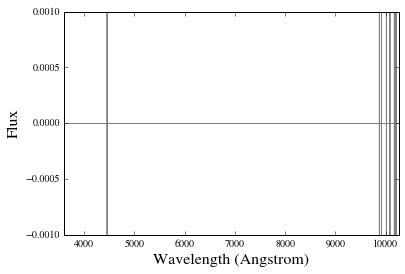

3.57467981892 1 / Angstrom
No spectrum found for BOSSJ0902+3602 and wvobs=7720.22 Angstrom!
2.19715380549 1 / Angstrom
No spectrum found for BOSSJ0903+5133 and wvobs=8020.19 Angstrom!
5.94320061678 1 / Angstrom
Using spSpec-51929-0470-486.fit.gz for BOSSJ0904+0042
S/N 5.94320061678 1 / Angstrom


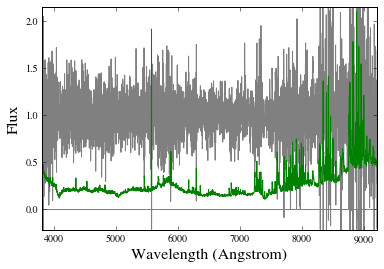

6.67679064849 1 / Angstrom
Using spec-5299-55927-0744.fits.gz for BOSSJ0906+1001
S/N 6.67679064849 1 / Angstrom


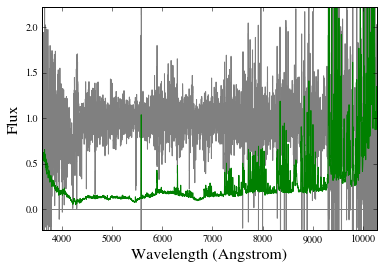

4.67264920024 1 / Angstrom
No spectrum found for BOSSJ0907+2802 and wvobs=7704.3 Angstrom!
36.9098569443 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ091046.69+041448.4_F.fits.gz for APOJ0910+0414
S/N 36.9098569443 1 / Angstrom


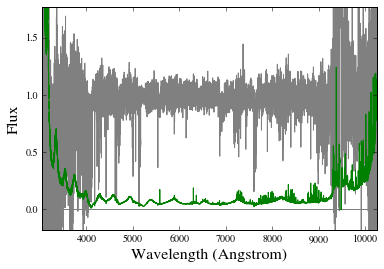

1.52209463166 1 / Angstrom
No spectrum found for BOSSJ0911+4905 and wvobs=7811.53 Angstrom!
4.91292255028 1 / Angstrom
No spectrum found for BOSSJ0912+4139 and wvobs=7765.52 Angstrom!
2.94237348928 1 / Angstrom
No spectrum found for BOSSJ0912+2518 and wvobs=7415.94 Angstrom!
34.6682804808 1 / Angstrom
Using spec-5809-56353-0052.fits.gz for BOSSJ0912+3056
S/N 34.6682804808 1 / Angstrom


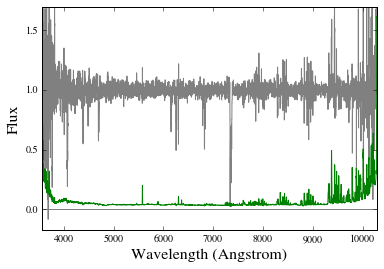

50.7473706336 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ091338.97-010704.6_F.fits.gz for BOSSJ0913-0107
S/N 50.7473706336 1 / Angstrom


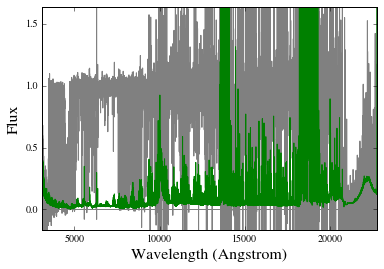

1.45932992968 1 / Angstrom
No spectrum found for BOSSJ0913+3151 and wvobs=7533.31 Angstrom!
5.43614069499 1 / Angstrom
No spectrum found for BOSSJ0914+0109 and wvobs=8781.12 Angstrom!
3.00572264311 1 / Angstrom
No spectrum found for BOSSJ0915+0119 and wvobs=8308.96 Angstrom!
1.9366698121 1 / Angstrom
No spectrum found for BOSSJ0916+4250 and wvobs=7660.5 Angstrom!
5.81557932888 1 / Angstrom
BOSSJ0920+3340 does not survive atmosphere cut
No spectrum found for BOSSJ0920+3340 and wvobs=7644.44 Angstrom!
No spectrum found for APOJ0924+3929 and wvobs=8068.09 Angstrom!
3.24605764451 1 / Angstrom
No spectrum found for BOSSJ0932+0843 and wvobs=7721.15 Angstrom!
24.1443925833 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ093225.60+092500.2_F.fits.gz for APOJ0932+0925
S/N 24.1443925833 1 / Angstrom


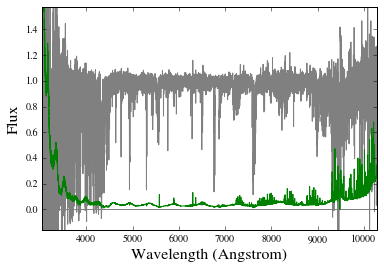

7.52732021919 1 / Angstrom
Using spec-5716-56684-0357.fits.gz for BOSSJ0933+5920
S/N 7.52732021919 1 / Angstrom


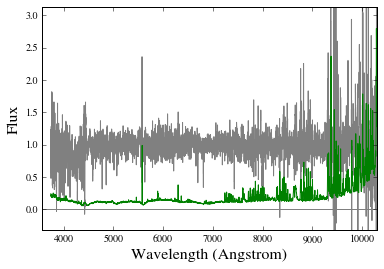

5.68616527187 1 / Angstrom
Using spec-4695-55957-0570.fits.gz for BOSSJ0935+4532
S/N 5.68616527187 1 / Angstrom


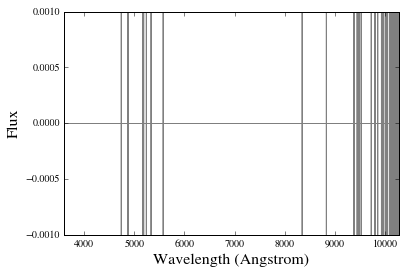

1.6443878698 1 / Angstrom
No spectrum found for BOSSJ0936-0058 and wvobs=8971.96 Angstrom!
No spectrum found for APOJ0938+5317 and wvobs=8576.5 Angstrom!
1.24018950887 1 / Angstrom
No spectrum found for BOSSJ0940+3345 and wvobs=7789.14 Angstrom!
7.32159721792 1 / Angstrom
Using spec-5788-56255-0380.fits.gz for BOSSJ0941+2308
S/N 7.32159721792 1 / Angstrom


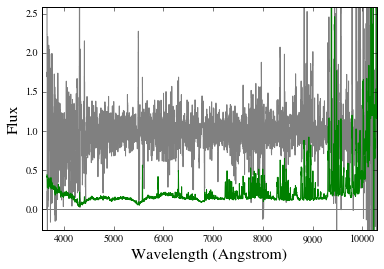

1.60921400486 1 / Angstrom
No spectrum found for BOSSJ0942+1347 and wvobs=7553.55 Angstrom!
2.44264443716 1 / Angstrom
No spectrum found for BOSSJ0956+0248 and wvobs=8430.85 Angstrom!
2.77116495354 1 / Angstrom
No spectrum found for BOSSJ1000+0337 and wvobs=7547.97 Angstrom!
3.46998556914 1 / Angstrom
No spectrum found for BOSSJ1001+4023 and wvobs=7907.68 Angstrom!
1.75620996639 1 / Angstrom
No spectrum found for BOSSJ1002+0020 and wvobs=8883.45 Angstrom!
14.7555826899 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ100507.08+501929.6.fits.gz for SDSSJ1005+5019
S/N 14.7555826899 1 / Angstrom


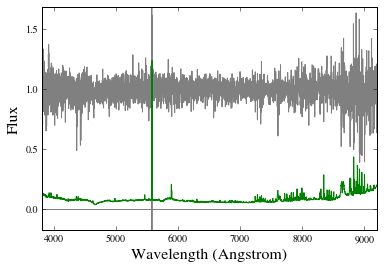

6.97767486501 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ100627.10+480429.9.fits for BOSSJ1006+4804
S/N 6.97767486501 1 / Angstrom


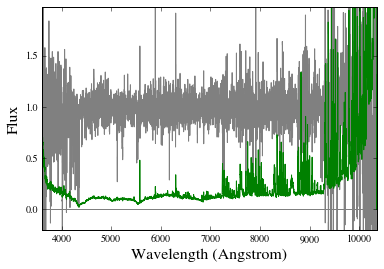

3.32389750072 1 / Angstrom
No spectrum found for BOSSJ1009+1749 and wvobs=8344.4 Angstrom!
5.81036292526 1 / Angstrom
BOSSJ1009+0236 does not survive atmosphere cut
No spectrum found for BOSSJ1009+0236 and wvobs=7650.85 Angstrom!
7.82263628096 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ100940.58+250053.9.fits for APOJ1009+2500
S/N 7.82263628096 1 / Angstrom


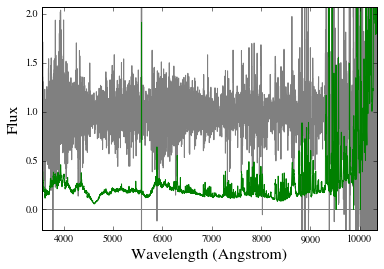

13.7953483268 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ101003.47+403754.9.fits for BOSSJ1010+4037
S/N 13.7953483268 1 / Angstrom


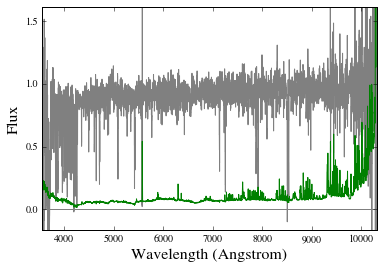

3.7538143493 1 / Angstrom
No spectrum found for BOSSJ1010+4517 and wvobs=7788.56 Angstrom!
1.73869391345 1 / Angstrom
No spectrum found for BOSSJ1010+0821 and wvobs=8030.55 Angstrom!
3.9714772351 1 / Angstrom
No spectrum found for BOSSJ1013+0330 and wvobs=8227.58 Angstrom!
4.99916702553 1 / Angstrom
No spectrum found for BOSSJ1014+2653 and wvobs=7629.92 Angstrom!
1.19621811313 1 / Angstrom
No spectrum found for BOSSJ1015+1245 and wvobs=7499.5 Angstrom!
10.068202495 1 / Angstrom
Using spec-7081-56684-0951.fits.gz for BOSSJ1017+6226
S/N 10.068202495 1 / Angstrom


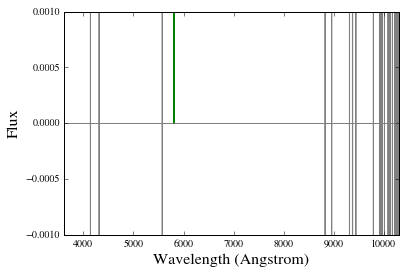

2.65962372231 1 / Angstrom
No spectrum found for BOSSJ1020+6119 and wvobs=7796.7 Angstrom!
5.35375024294 1 / Angstrom
No spectrum found for BOSSJ1024+0354 and wvobs=7461.87 Angstrom!
14.3536421488 1 / Angstrom
Using spec-6463-56340-0210.fits.gz for BOSSJ1024+2616
S/N 14.3536421488 1 / Angstrom


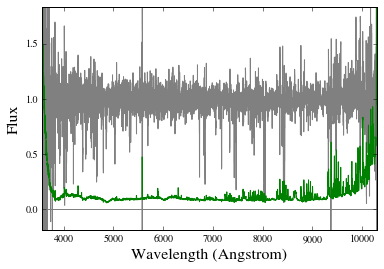

No spectrum found for APOJ1026+4614 and wvobs=12165.5 Angstrom!
3.14454983504 1 / Angstrom
No spectrum found for BOSSJ1028+5121 and wvobs=7468.08 Angstrom!
5.95205186365 1 / Angstrom
Using spec-5344-55924-0888.fits.gz for BOSSJ1034+0856
S/N 5.95205186365 1 / Angstrom


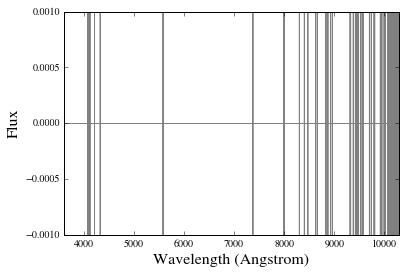

8.45399951888 1 / Angstrom
Using spec-6702-56381-0508.fits.gz for BOSSJ1036+5012
S/N 8.45399951888 1 / Angstrom


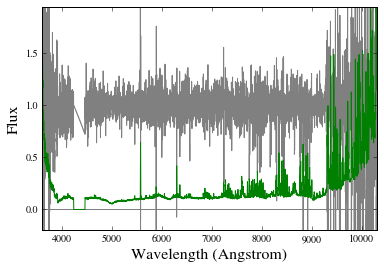

No spectrum found for BOSSJ1039+5026 and wvobs=11555.2 Angstrom!
No spectrum found for APOJ1041+1957 and wvobs=7959.85 Angstrom!
4.79828773163 1 / Angstrom
No spectrum found for BOSSJ1042+6459 and wvobs=8351.17 Angstrom!
4.85146199737 1 / Angstrom
No spectrum found for BOSSJ1044+3139 and wvobs=7568.47 Angstrom!
No spectrum found for APOJ1045+4351 and wvobs=9586.71 Angstrom!
2.97770173255 1 / Angstrom
No spectrum found for BOSSJ1045+1000 and wvobs=8447.16 Angstrom!
6.16082079249 1 / Angstrom
Using spec-7094-56660-0184.fits.gz for BOSSJ1052+5553
S/N 6.16082079249 1 / Angstrom


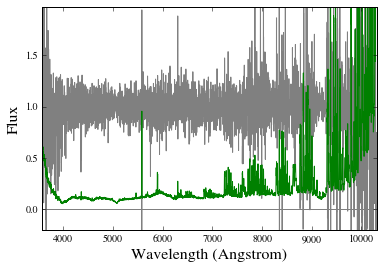

1.69639199504 1 / Angstrom
No spectrum found for BOSSJ1059+6255 and wvobs=7671.11 Angstrom!
22.7163761852 1 / Angstrom
Using spec-6693-56384-0164.fits.gz for BOSSJ1106+4635
S/N 22.7163761852 1 / Angstrom


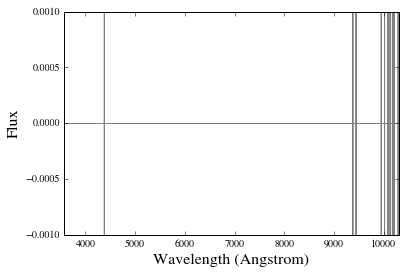

5.47798433389 1 / Angstrom
No spectrum found for BOSSJ1113+3305 and wvobs=8087.98 Angstrom!
4.36607947932 1 / Angstrom
No spectrum found for BOSSJ1118+4025 and wvobs=8174.43 Angstrom!
1.19325316072 1 / Angstrom
No spectrum found for BOSSJ1136-0029 and wvobs=7301.72 Angstrom!
9.34201599826 1 / Angstrom
Using spec-7113-56711-0152.fits.gz for BOSSJ1138+6329
S/N 9.34201599826 1 / Angstrom


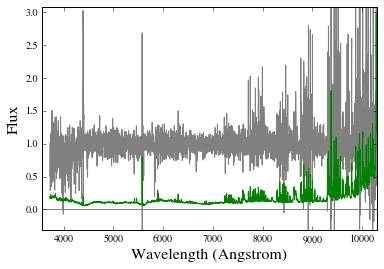

9.28504947898 1 / Angstrom
BOSSJ1140+2709 does not survive atmosphere cut
4.08212743685 1 / Angstrom
No spectrum found for BOSSJ1140+2709 and wvobs=7602.13 Angstrom!
6.58506102897 1 / Angstrom
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ114145.43+072423.3_b400_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ114145.43+072423.3_F.fits.gz for APOJ1141+0724
S/N 6.58506102897 1 / Angstrom


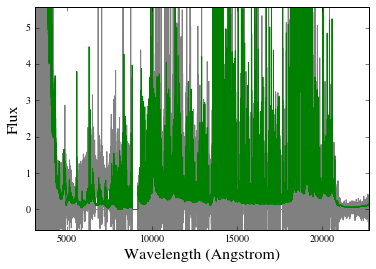

2.78014037032 1 / Angstrom
No spectrum found for BOSSJ1142+2822 and wvobs=7549.73 Angstrom!
2.62605326807 1 / Angstrom
No spectrum found for BOSSJ1142+1128 and wvobs=7301.66 Angstrom!
No spectrum found for BOSSJ1144+0959 and wvobs=11110.2 Angstrom!
64.7952962809 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ114546.22+032251.9_F.fits.gz for BOSSJ1145+0322
S/N 64.7952962809 1 / Angstrom


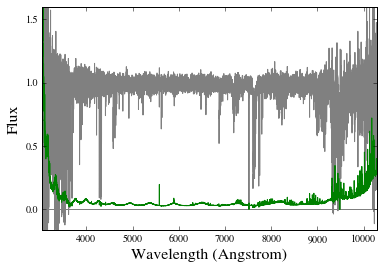

5.85374286836 1 / Angstrom
BOSSJ1150+5802 does not survive atmosphere cut
No spectrum found for BOSSJ1150+5802 and wvobs=7666.46 Angstrom!
15.3933608065 1 / Angstrom
12.3748955684 1 / Angstrom
Using spec-5383-56013-0218.fits.gz for BOSSJ1152+1507
S/N 15.3933608065 1 / Angstrom


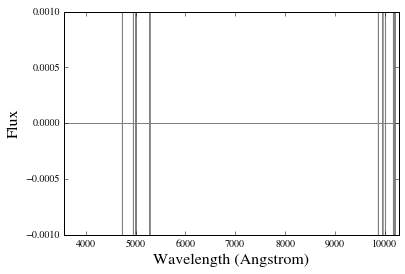

11.5502736747 1 / Angstrom
Using spec-4697-55660-0326.fits.gz for BOSSJ1155+3934
S/N 11.5502736747 1 / Angstrom


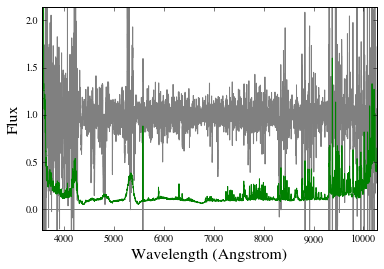

2.30275099694 1 / Angstrom
No spectrum found for BOSSJ1159+1433 and wvobs=7578.52 Angstrom!
1.40158578374 1 / Angstrom
No spectrum found for BOSSJ1200+0129 and wvobs=8506.2 Angstrom!
9.52919675952 1 / Angstrom
Using spec-5389-55953-0264.fits.gz for BOSSJ1202+0747
S/N 9.52919675952 1 / Angstrom


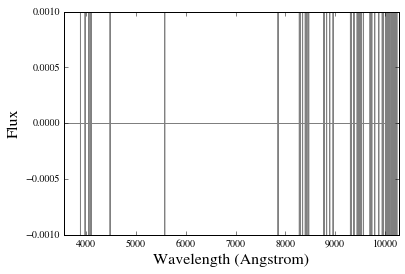

No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120416.69+022111.0_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz
Using conti=1 for HIRES
17.0979087122 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ120416.69+022111.0_F.fits.gz for BOSSJ1204+0221
S/N 17.0979087122 1 / Angstrom


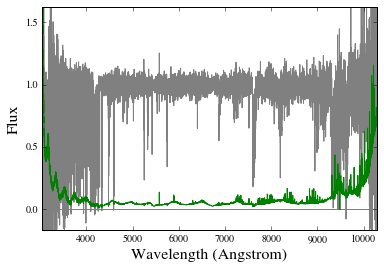

15.4389921126 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ120857.16+073727.3_F.fits.gz for APOJ1208+0737
S/N 15.4389921126 1 / Angstrom


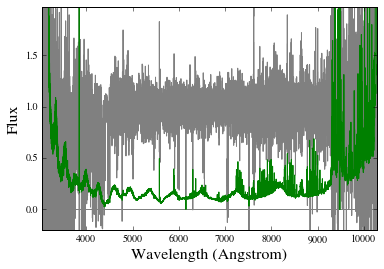

7.16850432086 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ121201.68+324013.3.fits for BOSSJ1212+3240
S/N 7.16850432086 1 / Angstrom


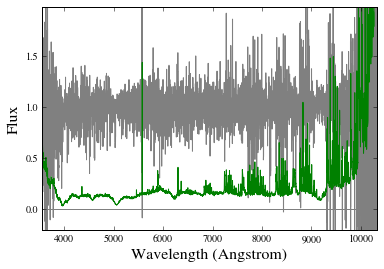

8.46554531486 1 / Angstrom
Using spec-6640-56385-0544.fits.gz for BOSSJ1213+4719
S/N 8.46554531486 1 / Angstrom


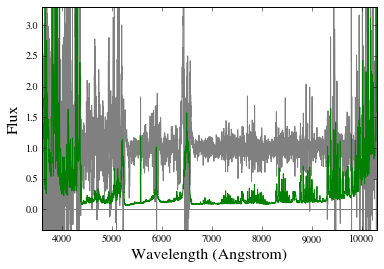

21.3084563076 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ121558.80+571555.4.fits.gz for BOSSJ1215+5715
S/N 21.3084563076 1 / Angstrom


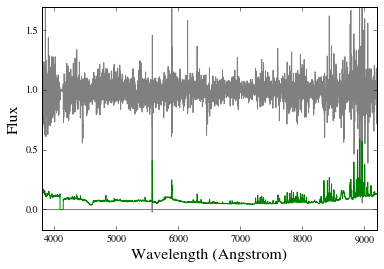

3.70388871378 1 / Angstrom
No spectrum found for BOSSJ1225+5709 and wvobs=8101.34 Angstrom!
No spectrum found for BOSSJ1231+0029 and wvobs=11748 Angstrom!
1.81444931088 1 / Angstrom
No spectrum found for BOSSJ1239+3955 and wvobs=7946.36 Angstrom!
8.54440305563 1 / Angstrom
BOSSJ1242+5331 does not survive atmosphere cut
No spectrum found for BOSSJ1242+5331 and wvobs=7598.53 Angstrom!
8.57454315341 1 / Angstrom
Using spec-3972-55589-0570.fits.gz for BOSSJ1244+3916
S/N 8.57454315341 1 / Angstrom


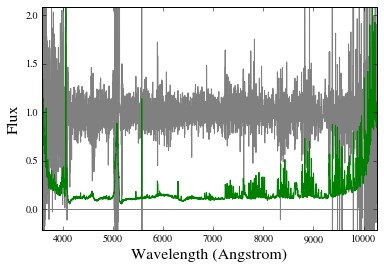

6.74381773911 1 / Angstrom
Using spec-6482-56358-0110.fits.gz for BOSSJ1244+3208
S/N 6.74381773911 1 / Angstrom


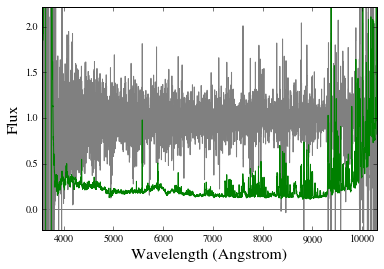

1.13208687866 1 / Angstrom
No spectrum found for BOSSJ1245+5922 and wvobs=8153.23 Angstrom!
5.459883638 1 / Angstrom
No spectrum found for BOSSJ1246+2345 and wvobs=8373.28 Angstrom!
13.3103916847 1 / Angstrom
Using spec-4703-55617-0350.fits.gz for BOSSJ1248+4058
S/N 13.3103916847 1 / Angstrom


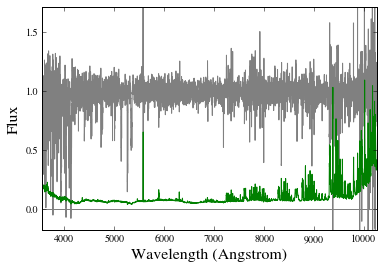

0.924037966806 1 / Angstrom
No spectrum found for BOSSJ1253+6327 and wvobs=8298.17 Angstrom!
2.17637696439 1 / Angstrom
No spectrum found for BOSSJ1255+2234 and wvobs=7875.37 Angstrom!
6.41940888063 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ130125.67+475930.8.fits.gz for SDSSJ1301+4759
S/N 6.41940888063 1 / Angstrom


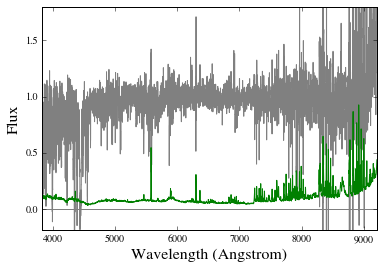

No spectrum found for APOJ1306+6158 and wvobs=8693.68 Angstrom!
1.35731215781 1 / Angstrom
No spectrum found for BOSSJ1310+1134 and wvobs=8158.94 Angstrom!
1.8449103359 1 / Angstrom
No spectrum found for BOSSJ1319+2138 and wvobs=7723.47 Angstrom!
9.55991783443 1 / Angstrom
Using spec-6828-56430-0134.fits.gz for BOSSJ1325+5409
S/N 9.55991783443 1 / Angstrom


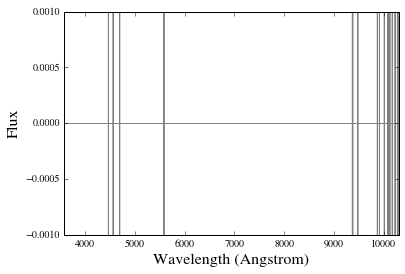

No spectrum found for APOJ1327+3423 and wvobs=7406.07 Angstrom!
1.14708149242 1 / Angstrom
No spectrum found for BOSSJ1335+4330 and wvobs=8353.66 Angstrom!
3.41684784301 1 / Angstrom
No spectrum found for BOSSJ1346+1952 and wvobs=8577.77 Angstrom!
3.43012465908 1 / Angstrom
No spectrum found for BOSSJ1356+6133 and wvobs=8454.59 Angstrom!
8.03910006961 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ135849.54+273756.9.fits for APOJ1358+2737
S/N 8.03910006961 1 / Angstrom


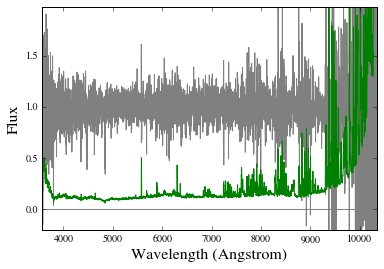

3.21061965019 1 / Angstrom
No spectrum found for BOSSJ1402+4701 and wvobs=8153.94 Angstrom!
1.09447646586 1 / Angstrom
No spectrum found for BOSSJ1410+4804 and wvobs=7788.7 Angstrom!
28.5665031075 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ141337.96+271511.0.fits for SDSSJ1413+2715
S/N 28.5665031075 1 / Angstrom


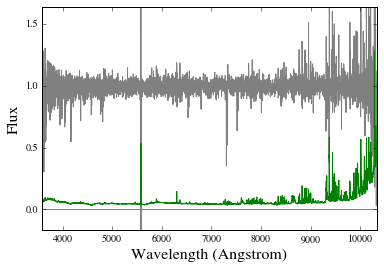

No spectrum found for BOSSJ1420+0227 and wvobs=12909.8 Angstrom!
47.5560324827 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ142054.92+160342.9_F.fits.gz for APOJ1420+1603
S/N 47.5560324827 1 / Angstrom


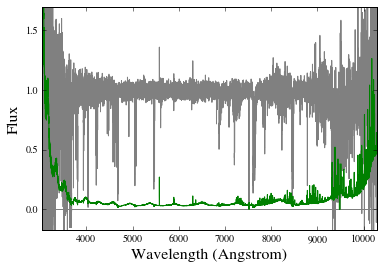

3.82840281303 1 / Angstrom
No spectrum found for BOSSJ1422+4652 and wvobs=7681.55 Angstrom!
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.74-012136.2_b1200_F.fits.gz
52.8565327795 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ142758.74-012136.2_F.fits.gz for BOSSJ1427-0121
S/N 52.8565327795 1 / Angstrom


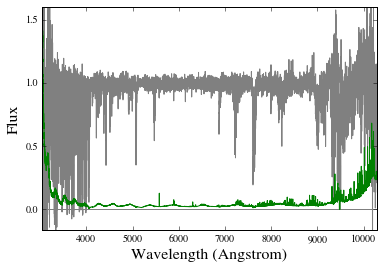

1.36100565584 1 / Angstrom
No spectrum found for BOSSJ1428+5509 and wvobs=7739.02 Angstrom!
7.77732180409 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ143109.22+572726.4.fits for APOJ1431+5727
S/N 7.77732180409 1 / Angstrom


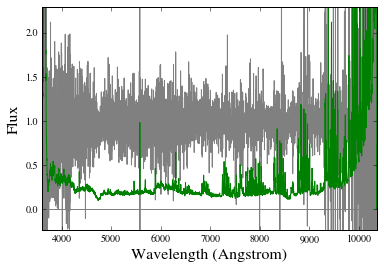

8.38907963357 1 / Angstrom
Using spec-5467-55973-0438.fits.gz for BOSSJ1433+0827
S/N 8.38907963357 1 / Angstrom


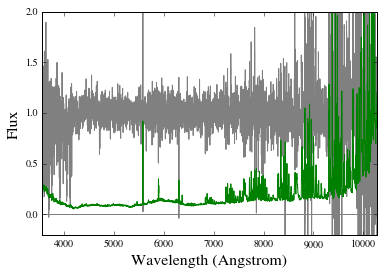

12.5135888614 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_4_45/SDSSJ143344.55+064111.9.fits for BOSSJ1433+0641
S/N 12.5135888614 1 / Angstrom


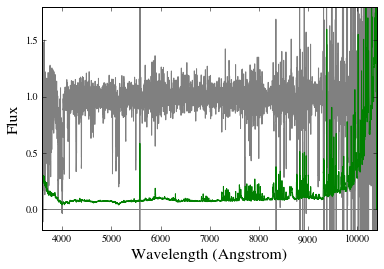

19.7377055954 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ144231.91+013734.8.fits for BOSSJ1442+0137
S/N 19.7377055954 1 / Angstrom


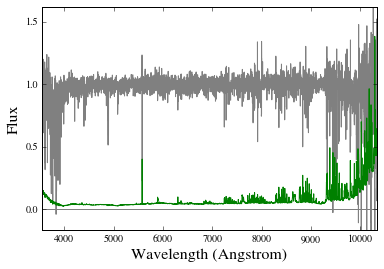

1.19605557185 1 / Angstrom
No spectrum found for BOSSJ1448+5649 and wvobs=7859.53 Angstrom!
2.07260584165 1 / Angstrom
No spectrum found for BOSSJ1457+0237 and wvobs=7854.91 Angstrom!
7.30253429574 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ150812.80+363530.3.fits for BOSSJ1508+3635
S/N 7.30253429574 1 / Angstrom


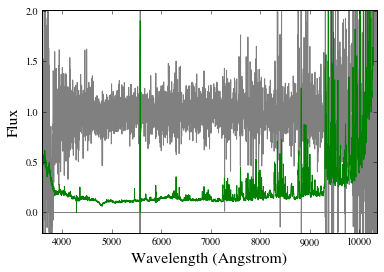

4.31914783141 1 / Angstrom
No spectrum found for BOSSJ1515+2627 and wvobs=8201.43 Angstrom!
2.18764357959 1 / Angstrom
No spectrum found for BOSSJ1517+2002 and wvobs=7599.35 Angstrom!
1.33974866041 1 / Angstrom
No spectrum found for BOSSJ1530+2515 and wvobs=7812.69 Angstrom!
13.9721521863 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ153329.17+142537.8.fits for BOSSJ1533+1425
S/N 13.9721521863 1 / Angstrom


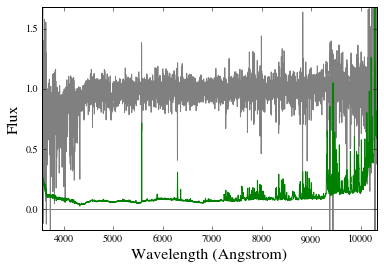

9.58081313814 1 / Angstrom
Using spec-3949-55650-0016.fits.gz for BOSSJ1534+2153
S/N 9.58081313814 1 / Angstrom


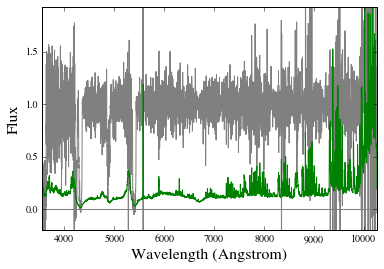

2.15926704987 1 / Angstrom
No spectrum found for BOSSJ1538+5707 and wvobs=8195.92 Angstrom!
6.62602139399 1 / Angstrom
Using spec-4723-56033-0012.fits.gz for BOSSJ1539+3146
S/N 6.62602139399 1 / Angstrom


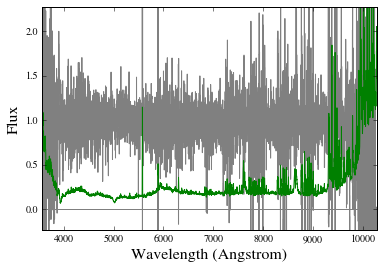

38.5550305775 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ155325.89+192137.7_F.fits.gz for APOJ1553+1921
S/N 38.5550305775 1 / Angstrom


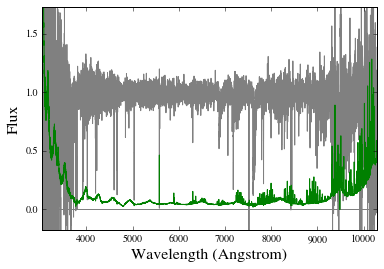

11.1163570505 1 / Angstrom
Using spec-4900-55739-0026.fits.gz for BOSSJ1554+1244
S/N 11.1163570505 1 / Angstrom


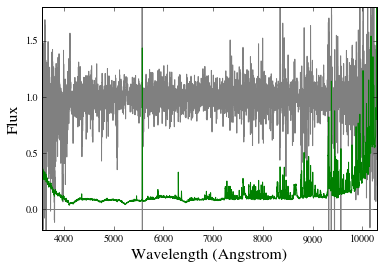

1.91725211864 1 / Angstrom
No spectrum found for BOSSJ1556+3040 and wvobs=8418.32 Angstrom!
3.84081511185 1 / Angstrom
No spectrum found for BOSSJ1557+0434 and wvobs=7999.2 Angstrom!
No spectrum found for APOJ1559+4943 and wvobs=7998.35 Angstrom!
25.4579658661 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ160546.67+511323.0.fits for BOSSJ1605+5113
S/N 25.4579658661 1 / Angstrom


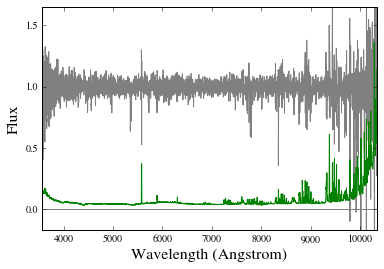

1.13422573394 1 / Angstrom
No spectrum found for BOSSJ1618+1842 and wvobs=8523.5 Angstrom!
4.17944620183 1 / Angstrom
No spectrum found for BOSSJ1619+1926 and wvobs=7777.76 Angstrom!
No spectrum found for BOSSJ1627+2215 and wvobs=11897.1 Angstrom!
No spectrum found for APOJ1627+4606 and wvobs=13463.3 Angstrom!
6.34130257513 1 / Angstrom
BOSSJ1628+2342 does not survive atmosphere cut
No spectrum found for BOSSJ1628+2342 and wvobs=7607.08 Angstrom!
4.43988879527 1 / Angstrom
No spectrum found for BOSSJ1631+4333 and wvobs=8435.48 Angstrom!
4.51644204353 1 / Angstrom
No spectrum found for BOSSJ1631+3659 and wvobs=7381.26 Angstrom!
4.12502352664 1 / Angstrom
No spectrum found for BOSSJ1635+2547 and wvobs=8023.05 Angstrom!
1.72611448577 1 / Angstrom
No spectrum found for BOSSJ1651+3410 and wvobs=7463.04 Angstrom!
No spectrum found for BOSSJ1657+3105 and wvobs=8757.59 Angstrom!
1.86423847247 1 / Angstrom
No spectrum found for BOSSJ2053-0104 and wvobs=8426.09 Angstrom!
26.9500889147 1 / Angstr

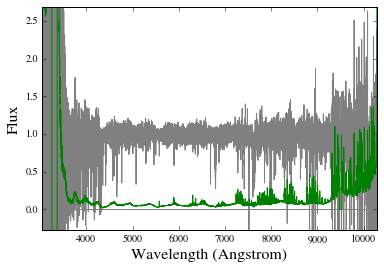

0.287405032015 1 / Angstrom
No spectrum found for BOSSJ2156-0003 and wvobs=7490.91 Angstrom!
8.2602838258 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ220248.31+123656.3.fits for BOSSJ2202+1236
S/N 8.2602838258 1 / Angstrom


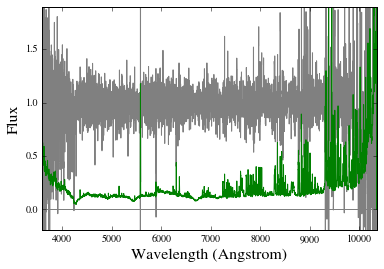

0.406569781522 1 / Angstrom
No spectrum found for BOSSJ2212-0011 and wvobs=8337.1 Angstrom!
5.41941707019 1 / Angstrom
No spectrum found for BOSSJ2255-0001 and wvobs=7640.12 Angstrom!
9.53013642375 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ225549.55-000927.7.fits for BOSSJ2255-0009
S/N 9.53013642375 1 / Angstrom


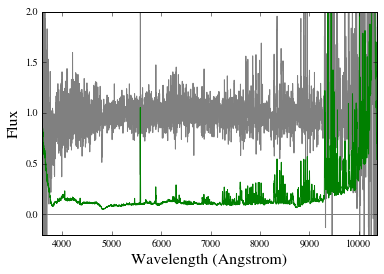

2.93680912861 1 / Angstrom
No spectrum found for BOSSJ2314-0108 and wvobs=7400.53 Angstrom!
1.90566886261 1 / Angstrom
No spectrum found for BOSSJ2338-0003 and wvobs=9618.55 Angstrom!
10.997173696 1 / Angstrom
BOSSJ2341-0041 does not survive atmosphere cut
5.77009120973 1 / Angstrom
BOSSJ2341-0041 does not survive atmosphere cut
No spectrum found for BOSSJ2341-0041 and wvobs=7637.37 Angstrom!
4.10655036616 1 / Angstrom
No spectrum found for BOSSJ2348+0110 and wvobs=7534.78 Angstrom!
0.642982911488 1 / Angstrom
No spectrum found for BOSSJ2352-0015 and wvobs=7627.16 Angstrom!
0.575150047201 1 / Angstrom
No spectrum found for BOSSJ2354-0019 and wvobs=7700.93 Angstrom!


In [2]:
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,dd in enumerate(all_dict):
    if dd is None:
        continue
    if 'J0822+1319' in dd['qpq']['NAME']: #BAL
        idx_mask.append(ii) 
for idx in idx_mask:
    stck_mskN[idx,:] = 0.

In [3]:
np.sum(stck_mskN,0)
sv_zfg = []
sv_Rperp = []
for ii,dd in enumerate(all_dict):
    if dd is None:
        continue
    if np.sum(stck_mskN[ii,:]) == 0:
        continue
    sv_zfg.append(dd['qpq']['Z_FG'])
    sv_Rperp.append(dd['qpq']['R_PHYS'])
np.median(sv_zfg),np.median(sv_Rperp)

(1.8843899965286255, 149.57309138481227)

## Stack and plot

### Mean

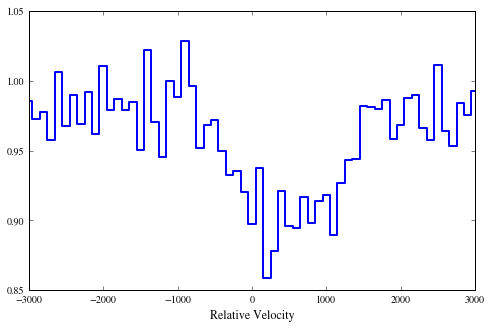

In [4]:
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

### Median

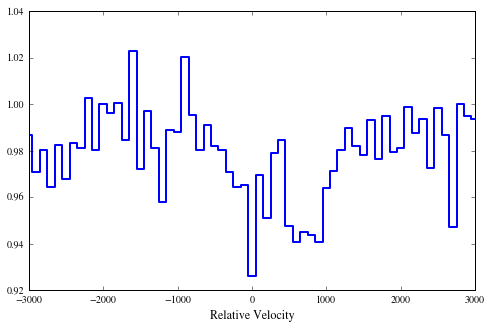

In [5]:
fin_velo, fin_flx_med, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

### Write

In [6]:
from linetools.spectra.xspectrum1d import XSpectrum1D
outfil = 'Output/QPQ9_zIRMgII_2796_mean.fits'
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
fin_wave = fin_velo.to(u.AA,equivalencies=relativistic_equiv)
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx)))
xspec1d.write_to_fits(outfil,clobber=True)
dat = np.transpose([fin_wave,u.Quantity(fin_flx),np.ones_like(fin_flx)*0.1])
outfil = 'Output/QPQ9_zIRMgII_2796_med.fits'
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx_med)))
xspec1d.write_to_fits(outfil,clobber=True)
dat = np.transpose([fin_wave,u.Quantity(fin_flx_med),np.ones_like(fin_flx_med)*0.1])

Wrote spectrum to Output/QPQ9_zIRMgII_2796_mean.fits
Wrote spectrum to Output/QPQ9_zIRMgII_2796_med.fits


## Bootstrap

In [7]:
#Mean
reload(qpq9b)
qpq9b.boot_trans(wrest=2796.354*u.AA,outfil='../Bootstrap/Output/IRMgII_2796_mean.fits',stack_tup=stack_tup)

Equivalent width skewness: Mean=0.763425, Median=0.741312, std=0.197488 for Ntrials=10000
Tau- or flux-weighted centroid: Mean = 303.885 km / s, std=91.5393 km / s
Wrote ../Bootstrap/Output/IRMgII_2796_mean.fits


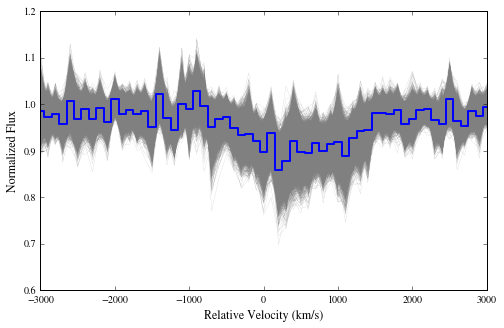

In [8]:
# plot 
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/IRMgII_2796_mean.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

0.2914

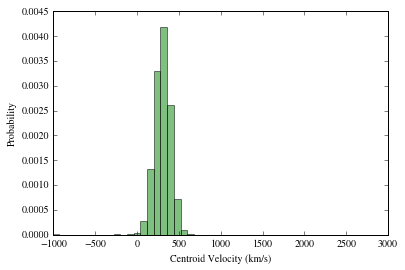

In [9]:
# Plot centroids
tau_cen = hdulist[3].data
n, bins, patches = plt.hist(tau_cen, 50, normed=1, facecolor='green', alpha=0.5, range=(-1000,3000))
plt.xlabel('Centroid Velocity (km/s)')
plt.ylabel('Probability')
len(np.where(tau_cen < 256)[0])/len(tau_cen)

In [10]:
#Median
qpq9b.boot_trans(wrest=2796.354*u.AA,outfil='../Bootstrap/Output/IRMgII_2796_med.fits',stack_tup=stack_tup,median=True)

Equivalent width skewness: Mean=0.809336, Median=0.766021, std=0.329738 for Ntrials=10000
Tau- or flux-weighted centroid: Mean = 271.642 km / s, std=110.405 km / s
Wrote ../Bootstrap/Output/IRMgII_2796_med.fits


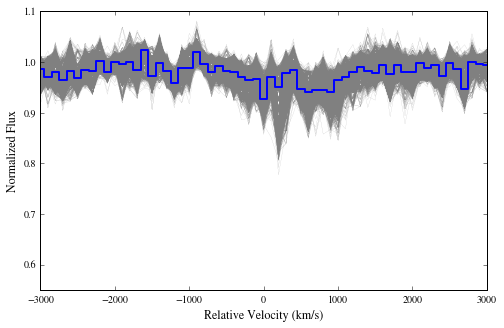

In [11]:
# plot trials
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/IRMgII_2796_med.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.axis([-3000,3000,0.55,1.1])
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

# [OIII] only

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
0.94873000285 1 / Angstrom
No spectrum found for BOSSJ0057-0001 and wvobs=8838.87 Angstrom!
3.28753438111 1 / Angstrom
No continuum: /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ023946.44-010644.1_F.fits.gz
No spectrum found for BOSSJ0239-0106 and wvobs=9224.56 Angstrom!
No spectrum found for APOJ0800+3542 and wvobs=8339.6 Angstrom!
6.78798669602 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ084159.26+392140.0.fits for BOSSJ0841+3921
S/N 6.78798669602 1 / Angstrom


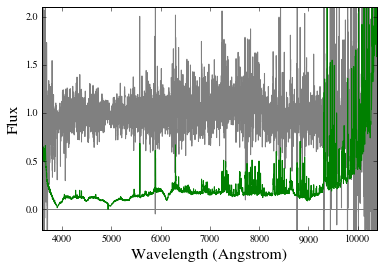

27.2848054013 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ085357.49-001106.1_F.fits.gz for BOSSJ0853-0011
S/N 27.2848054013 1 / Angstrom


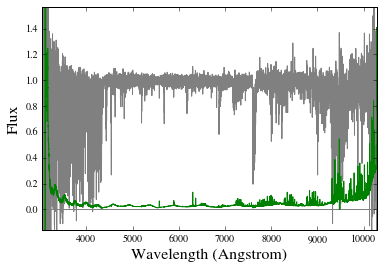

36.9098569443 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ091046.69+041448.4_F.fits.gz for APOJ0910+0414
S/N 36.9098569443 1 / Angstrom


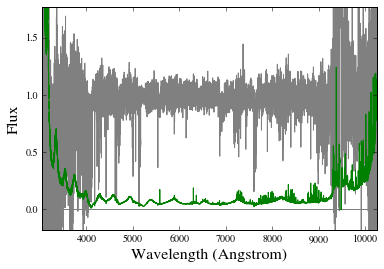

5.43614069499 1 / Angstrom
No spectrum found for BOSSJ0914+0109 and wvobs=8781.12 Angstrom!
24.1443925833 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ093225.60+092500.2_F.fits.gz for APOJ0932+0925
S/N 24.1443925833 1 / Angstrom


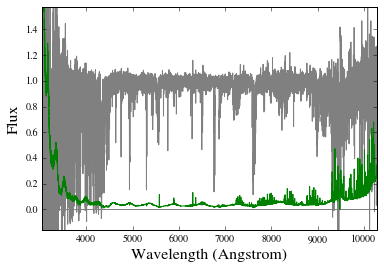

No spectrum found for APOJ0938+5317 and wvobs=8576.5 Angstrom!
6.97767486501 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ100627.10+480429.9.fits for BOSSJ1006+4804
S/N 6.97767486501 1 / Angstrom


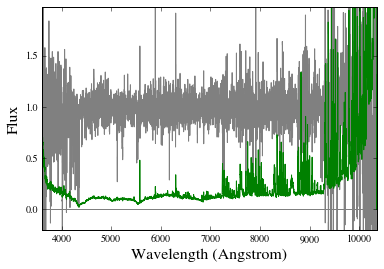

No spectrum found for BOSSJ1039+5026 and wvobs=11555.2 Angstrom!
No spectrum found for BOSSJ1144+0959 and wvobs=11110.2 Angstrom!
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120416.69+022111.0_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz
Using conti=1 for HIRES
17.0979087122 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ120416.69+022111.0_F.fits.gz for BOSSJ1204+0221
S/N 17.0979087122 1 / Angstrom


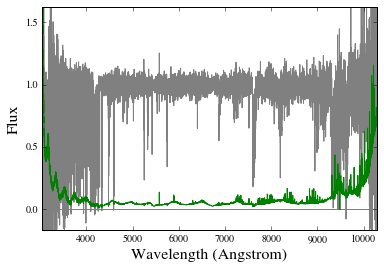

21.3084563076 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ121558.80+571555.4.fits.gz for BOSSJ1215+5715
S/N 21.3084563076 1 / Angstrom


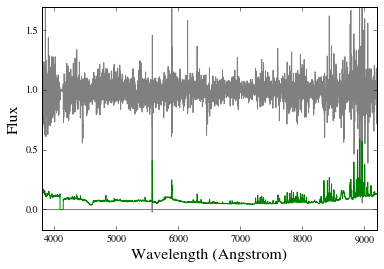

No spectrum found for BOSSJ1231+0029 and wvobs=11748 Angstrom!
3.21061965019 1 / Angstrom
No spectrum found for BOSSJ1402+4701 and wvobs=8153.94 Angstrom!
No spectrum found for BOSSJ1420+0227 and wvobs=12909.8 Angstrom!
47.5560324827 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ142054.92+160342.9_F.fits.gz for APOJ1420+1603
S/N 47.5560324827 1 / Angstrom


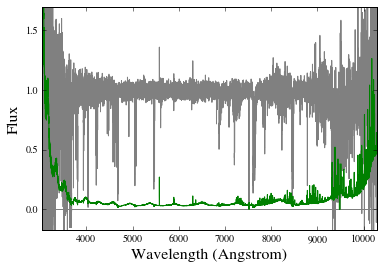

No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.74-012136.2_b1200_F.fits.gz
52.8565327795 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ142758.74-012136.2_F.fits.gz for BOSSJ1427-0121
S/N 52.8565327795 1 / Angstrom


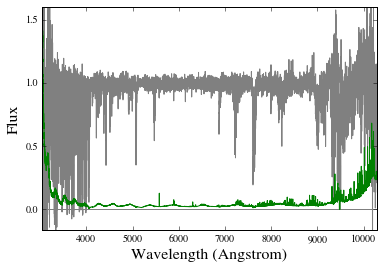

12.5135888614 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_4_45/SDSSJ143344.55+064111.9.fits for BOSSJ1433+0641
S/N 12.5135888614 1 / Angstrom


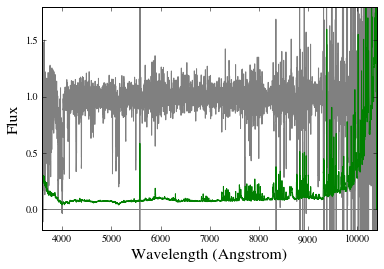

38.5550305775 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ155325.89+192137.7_F.fits.gz for APOJ1553+1921
S/N 38.5550305775 1 / Angstrom


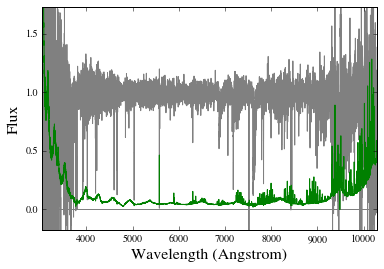

No spectrum found for APOJ1627+4606 and wvobs=13463.3 Angstrom!
26.9500889147 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ214620.98-075303.8_F.fits.gz for APOJ2146-0753
S/N 26.9500889147 1 / Angstrom


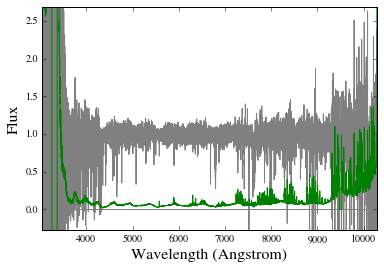

8.2602838258 1 / Angstrom
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ220248.31+123656.3.fits for BOSSJ2202+1236
S/N 8.2602838258 1 / Angstrom


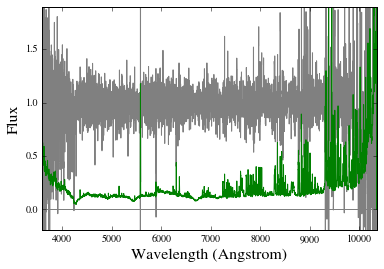

1.90566886261 1 / Angstrom
No spectrum found for BOSSJ2338-0003 and wvobs=9618.55 Angstrom!


In [12]:
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,vsig_cut=50*u.km/u.s,S2N_cut=5.5/u.AA)
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,dd in enumerate(all_dict):
    if dd is None:
        continue
    if 'J0822+1319' in dd['qpq']['NAME']: #BAL
        idx_mask.append(ii) 
for idx in idx_mask:
    stck_mskN[idx,:] = 0.

In [13]:
np.sum(stck_mskN,0)
sv_zfg = []
sv_Rperp = []
for ii,dd in enumerate(all_dict):
    if dd is None:
        continue
    if np.sum(stck_mskN[ii,:]) == 0:
        continue
    sv_zfg.append(dd['qpq']['Z_FG'])
    sv_Rperp.append(dd['qpq']['R_PHYS'])
np.median(sv_zfg),np.median(sv_Rperp)

(2.1152653933215744, 111.64153254054823)

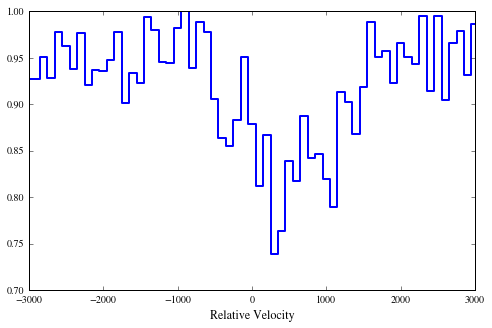

In [14]:
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

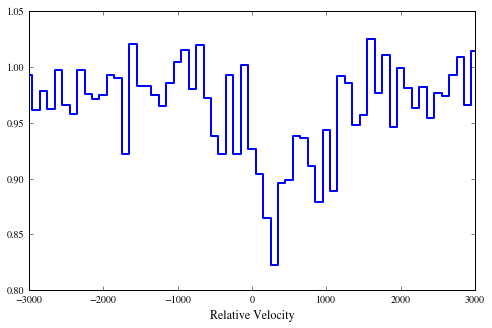

In [15]:
fin_velo, fin_flx_med, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

In [16]:
from linetools.spectra.xspectrum1d import XSpectrum1D
outfil = 'Output/QPQ9_zOIII_2796_mean.fits'
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
fin_wave = fin_velo.to(u.AA,equivalencies=relativistic_equiv)
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx)))
xspec1d.write_to_fits(outfil,clobber=True)
outfil = 'Output/QPQ9_zOIII_2796_med.fits'
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx_med)))
xspec1d.write_to_fits(outfil,clobber=True)

Wrote spectrum to Output/QPQ9_zOIII_2796_mean.fits
Wrote spectrum to Output/QPQ9_zOIII_2796_med.fits


## Bootstrap

In [17]:
#Mean 
reload(qpq9b)
qpq9b.boot_trans(wrest=2796.354*u.AA,outfil='../Bootstrap/Output/OIII_2796_mean.fits',stack_tup=stack_tup)

Equivalent width skewness: Mean=0.617233, Median=0.855174, std=72.1924 for Ntrials=10000
Tau- or flux-weighted centroid: Mean = 256.567 km / s, std=86.2181 km / s
Wrote ../Bootstrap/Output/OIII_2796_mean.fits


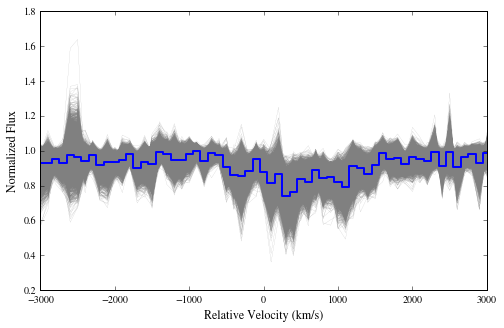

In [18]:
# plot 
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/OIII_2796_mean.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

0.505

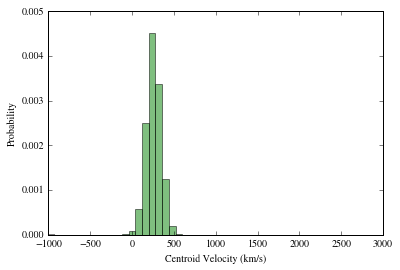

In [ ]:
# Plot centroids
tau_cen = hdulist[3].data
n, bins, patches = plt.hist(tau_cen, 50, normed=1, facecolor='green', alpha=0.5, range =(-1000,3000))
plt.xlabel('Centroid Velocity (km/s)')
plt.ylabel('Probability')
len(np.where(tau_cen < 256)[0])/len(tau_cen)

In [ ]:
#Median
reload(qpq9b)
qpq9b.boot_trans(wrest=2796.354*u.AA,outfil='../Bootstrap/Output/OIII_2796_med.fits',stack_tup=stack_tup,median=True)

In [ ]:
# plot 
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/OIII_2796_med.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

# Plot individual spectra

In [44]:
reload(qpq9k)
qpq9k.plt_qpq9(wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,stack_fg=True,zfg_mnx=(1.6,9999))

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
5.59863354536 1 / Angstrom
Using spSpec-52203-0685-134.fit.gz for BOSSJ0001+0000
S/N 5.59863354536 1 / Angstrom
7.03421660111 1 / Angstrom
Using spSpec-52519-0686-169.fit.gz for BOSSJ0008-0039
S/N 7.03421660111 1 / Angstrom
2.53864644477 1 / Angstrom
No spectrum found for BOSSJ0008-0039 and wvobs=8215.93 Angstrom!
No spectrum found for BOSSJ0042+1350 and wvobs=7762.94 Angstrom!
11.5360605851 1 / Angstrom
Using spSpec-51871-0420-304.fit.gz for BOSSJ0047+1447
S/N 11.5360605851 1 / Angstrom
5.55364004328 1 / Angstrom
Using spSpec-51783-0395-432.fit.gz for BOSSJ0057-0001
S/N 5.55364004328 1 / Angstrom
8.10635926971 1 / Angstrom
BOSSJ0103-0002 does not survive atmosphere cut
No spectrum found for BOSSJ0103-0002 and wvobs=7700.44 Angstrom!
11.5060184733 1 / Angstrom
Using spSpec-52209-0694-371.fit.gz for BOSSJ0106+0056
S/N 11.5060184733 1 / Angstrom
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ011150.0

TypeError: 'NoneType' object has no attribute '__getitem__'

# Split in two bins of g_UV

## MgII redshift stack

In [ ]:
# Load QPQ9 data structure
enigma_path = imp.find_module('enigma')[1]
QPQ9 = xxf.bintab_to_table(enigma_path+'/data/qpq/qpq9_final.fits')
c_QPQ9 = SkyCoord(QPQ9['FG_RA']*u.deg,QPQ9['FG_DEC']*u.deg)
# Find median g_UV
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_gUV = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_gUV.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0])
med_gUV = np.median(sv_gUV)

In [ ]:
# Mask spectra of gUV below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV <= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

In [ ]:
# Mask spectra of gUV above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV >= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

## [OIII] redshift stack

In [ ]:
# Find median g_UV
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,vsig_cut=50*u.km/u.s,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_gUV = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_gUV.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0])
med_gUV = np.median(sv_gUV)

In [ ]:
# Mask spectra of gUV below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV <= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

In [ ]:
# Mask spectra of gUV above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV >= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

# Split in two bins of R_phys

## MgII redshift stack 

In [ ]:
# Find median R_phys
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_Rphys = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_Rphys.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0])
med_Rphys = np.median(sv_Rphys)

In [ ]:
# Mask spectra of R_phys below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys <= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

In [ ]:
# Mask spectra of R_phys above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys >= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

## [OIII] redshift stack

In [ ]:
# Find median R_phys
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,vsig_cut=50*u.km/u.s,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_Rphys = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_Rphys.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0])
med_Rphys = np.median(sv_Rphys)

In [ ]:
# Mask spectra of R_phys below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys <= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

In [ ]:
# Mask spectra of R_phys above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys >= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

# Split in two bins of velocity separations 

## MgII redshift stack 

In [ ]:
# Find median velocity separation 
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_dv = []
for idict in all_dict:
    if idict == None:
        continue
    sv_dv.append(ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value)
med_dv = np.median(sv_dv)

In [ ]:
# Mask spectra of velocity separation below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv <= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))

In [ ]:
# Mask spectra of velocity separation above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv >= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))

## [OIII] redshift stack

In [ ]:
# Find median velocity separation 
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,vsig_cut=50*u.km/u.s,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_dv = []
for idict in all_dict:
    if idict == None:
        continue
    sv_dv.append(ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value)
print(sv_dv)
med_dv = np.median(sv_dv)

In [ ]:
# Mask spectra of velocity separation below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv <= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))

In [ ]:
# Mask spectra of velocity separation above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J0822+1319' in idict['qpq']['NAME']: 
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv >= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))